In [6]:
import varpy
from varpy import EVT_VaR,Student_VaR,Normal_VaR
import numpy as np 
import matplotlib.pyplot as plt 
from varpy.Backtester.bktst import Backtest
from varpy.Backtester.time_Significance import Testing
from varpy.Backtester.chtest import Bootstrap
import warnings
warnings.filterwarnings("ignore")

In [8]:
from varpy.data.SPX import load as d1
data = d1().values.reshape(-1,)* 100
data

array([-3.83446681,  0.1922183 ,  0.09556781, ..., -1.10373785,
       -1.89148219,  0.27717389])

In [9]:
VaR,CVaR = Normal_VaR(data ,0.01,7)
print(VaR,CVaR)

-3.2345688049767327 -3.657875675501764


In [10]:
VaR , CVaR = Backtest(data,500,7,0.01,model = 'Gaussian')

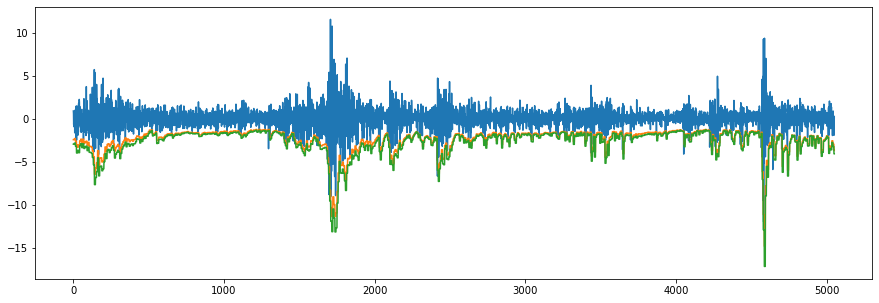

In [11]:
fig = plt.figure(figsize=(15,5))
plt.plot(data[500:])
plt.plot(VaR)
plt.plot(CVaR)
plt.show()

In [12]:
ts = Testing(data,VaR,CVaR,500,0.01)
print(ts.summary)

Outputs                       Statistics
--------------------------  ------------
Number of VaR Violations:     97
Number of CVaR Violations:    61
Christophersen Test:          28.52
Prob (Z-statistic):            4.439e-09
Quantile ratio:                1.11237
Kupiec Test:                  34.065
TUFF Test:                     8.519
Hass Test:                   424.187


In [13]:
Bootstrap(CVaR/VaR, ts.Q_ratio, 1000000)

(0.051708, -21.1469004332669)